In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer datos RTU
Conclusion: 21 Columnas 325129 filas, todos los datos 52.1+ MB en RAM

In [2]:
dfdata = pd.read_excel('data/allDataRTU_20230118.xlsx')
dfdata.rename( {'%dir':'dir'}, axis=1,inplace=True)
dfdata.head()

,dir,flowInd,flowStat,timeFirst,timeLast,duration,srcIP,srcPort,dstIP,dstPort,...,dstPortClassN,dstPortClass,nDPIMasterProto,nDPISubProto,nDPIclass,numPktsSnt,numPktsRTAggr,numBytesSnt,numBytesRTAggr,tcpStatesAFlags
0,A,1,0x0400020000004000,1.673968e+09,1.673969e+09,297.552491,9.9.5.9,36276,9.9.5.108,20000,...,20000,dnp,244,0,DNP3,150,300,1350,14700,0x03
1,B,1,0x0400000000004001,1.673968e+09,1.673969e+09,297.451999,9.9.5.108,20000,9.9.5.9,36276,...,20000,dnp,244,0,DNP3,150,300,13350,14700,0x03
2,A,2,0x0400000000004000,1.673968e+09,1.673969e+09,297.243289,9.9.5.211,20000,9.9.5.9,38815,...,38815,unknown,244,0,DNP3,164,402,3975,5307,0x03
3,B,2,0x0400020000004001,1.673968e+09,1.673969e+09,297.240063,9.9.5.9,38815,9.9.5.211,20000,...,38815,unknown,244,0,DNP3,238,402,1332,5307,0x03
4,A,3,0x0400000000004000,1.673968e+09,1.673969e+09,298.678374,9.9.5.246,20000,9.9.5.9,32165,...,32165,unknown,244,0,DNP3,294,535,9490,10804,0x03


In [3]:
#dfdata.rename( {'%dir':'dir'}, axis=1,inplace=True)

In [4]:
#information dataframe all data RTU LA PERLA
dfdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325129 entries, 0 to 325128
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   dir              325129 non-null  object 
 1   flowInd          325129 non-null  int64  
 2   flowStat         325129 non-null  object 
 3   timeFirst        325129 non-null  float64
 4   timeLast         325129 non-null  float64
 5   duration         325129 non-null  float64
 6   srcIP            325129 non-null  object 
 7   srcPort          325129 non-null  int64  
 8   dstIP            325129 non-null  object 
 9   dstPort          325129 non-null  int64  
 10  l4Proto          325129 non-null  int64  
 11  dstPortClassN    325129 non-null  int64  
 12  dstPortClass     325129 non-null  object 
 13  nDPIMasterProto  325129 non-null  int64  
 14  nDPISubProto     325129 non-null  int64  
 15  nDPIclass        325129 non-null  object 
 16  numPktsSnt       325129 non-null  int6

In [5]:
dfndpi_proto = pd.read_csv('data/nDPI_table_protocols.csv', names=['number','nameProto'])
dfndpi_proto

,number,nameProto
0,0,Unknown
1,1,FTP_CONTROL
2,2,POP3
3,3,SMTP
4,4,IMAP
...,...,...
277,277,iCloudPrivateRelay
278,278,EthernetIP
279,279,Badoo
280,280,AccuWeather


# Unicos flujos y su direccion
Conclusion: todos los fujos que solo tiene una direccion son **'A'**

Se observa en "Explore data La perla" que **dir** se puede filtrar A sin perder los datos

In [6]:
#Delete all duplicate Rows from dataFrame
flowindex = dfdata[['flowInd','dir']]
flowindex

,flowInd,dir
0,1,A
1,1,B
2,2,A
3,2,B
4,3,A
...,...,...
325124,189319,A
325125,189319,B
325126,189320,A
325127,189321,A


In [7]:
flowindex = flowindex.drop_duplicates(subset='flowInd',keep="first")
flowindex

,flowInd,dir
0,1,A
2,2,A
4,3,A
6,4,A
8,5,A
...,...,...
325121,189317,A
325123,189318,A
325124,189319,A
325126,189320,A


In [8]:
flowindex['dir'].value_counts()


dir
A    189321
Name: count, dtype: int64

In [9]:
# Disribucion de datos en porcentaje
dfdata['dir'].value_counts(normalize=True)*100

dir
A    58.229503
B    41.770497
Name: proportion, dtype: float64

~~~

ssstest
~~~


# Exploracion de datos
---

## Data init Exploratory

***summary*** 
* MAX Duration flow: 300.0s 
* BYtes aggregate MIN: 0B MAX: 199,678B
* MAX Data frequency: 
    * dir: A 
    * src/dstIP : 9.9.5.10 
    * dstPortClass/nDPIclass: SNMP
    * tcpStatesAFlag: 0x00
    

In [10]:
dfdata.head()

,dir,flowInd,flowStat,timeFirst,timeLast,duration,srcIP,srcPort,dstIP,dstPort,...,dstPortClassN,dstPortClass,nDPIMasterProto,nDPISubProto,nDPIclass,numPktsSnt,numPktsRTAggr,numBytesSnt,numBytesRTAggr,tcpStatesAFlags
0,A,1,0x0400020000004000,1.673968e+09,1.673969e+09,297.552491,9.9.5.9,36276,9.9.5.108,20000,...,20000,dnp,244,0,DNP3,150,300,1350,14700,0x03
1,B,1,0x0400000000004001,1.673968e+09,1.673969e+09,297.451999,9.9.5.108,20000,9.9.5.9,36276,...,20000,dnp,244,0,DNP3,150,300,13350,14700,0x03
2,A,2,0x0400000000004000,1.673968e+09,1.673969e+09,297.243289,9.9.5.211,20000,9.9.5.9,38815,...,38815,unknown,244,0,DNP3,164,402,3975,5307,0x03
3,B,2,0x0400020000004001,1.673968e+09,1.673969e+09,297.240063,9.9.5.9,38815,9.9.5.211,20000,...,38815,unknown,244,0,DNP3,238,402,1332,5307,0x03
4,A,3,0x0400000000004000,1.673968e+09,1.673969e+09,298.678374,9.9.5.246,20000,9.9.5.9,32165,...,32165,unknown,244,0,DNP3,294,535,9490,10804,0x03


In [11]:
dfdata.describe()

,flowInd,timeFirst,timeLast,duration,srcPort,dstPort,l4Proto,dstPortClassN,nDPIMasterProto,nDPISubProto,numPktsSnt,numPktsRTAggr,numBytesSnt,numBytesRTAggr
count,325129.000000,3.251290e+05,3.251290e+05,325129.000000,325129.000000,325129.000000,325129.000000,325129.000000,325129.000000,325129.0,325129.000000,325129.000000,325129.000000,325129.000000
mean,94902.240668,1.674025e+09,1.674025e+09,138.873570,25559.051417,18238.211605,9.429239,6585.186723,101.542735,0.0,92.281012,176.620274,3005.118965,5628.504551
std,54525.225857,3.303388e+04,3.303476e+04,134.127180,25520.742661,22906.399195,6.837984,10276.068893,98.123039,0.0,439.948428,803.176235,11648.647704,16124.064394
min,1.000000,1.673968e+09,1.673968e+09,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.000000
25%,47773.000000,1.673996e+09,1.673997e+09,0.015076,0.000000,0.000000,1.000000,0.000000,14.000000,0.0,2.000000,2.000000,69.000000,88.000000
50%,94941.000000,1.674025e+09,1.674025e+09,239.847905,20000.000000,161.000000,6.000000,161.000000,81.000000,0.0,3.000000,6.000000,88.000000,138.000000
75%,142147.000000,1.674054e+09,1.674054e+09,273.304999,53519.000000,32939.000000,17.000000,20000.000000,244.000000,0.0,75.000000,225.000000,1350.000000,5325.000000
max,189321.000000,1.674082e+09,1.674082e+09,299.998483,65534.000000,65531.000000,17.000000,62855.000000,264.000000,0.0,13596.000000,20698.000000,163689.000000,199678.000000


In [12]:
dfdata.describe(include=["object", "bool"])

,dir,flowStat,srcIP,dstIP,dstPortClass,nDPIclass,tcpStatesAFlags
count,325129,325129,325129,325129,325129,325129,325129
unique,2,8,158,171,10,11,20
top,A,0x0400000000004001,9.9.5.10,9.9.5.10,snmp,SNMP,0x00
freq,189321,132258,121148,95831,130009,130009,225179


In [13]:
dfdata.shape

(325129, 21)

## Data distribution by protocol/application

***summary*** 
* Percent distribution by protocol  (flows)
    * 39.99% SNMP
    * 30.43% DNP3
    * 25.64% ICMP
    * 27.76% NTP


For categorical (type `object`) and boolean (type `bool`) features we can use the `value_counts` method. Let's have a look at the distribution of column name:

nDPI protocol is: 


In [14]:
# distribucion de datos por TIPO, basado en "deep packet inspection"
tmp = dfdata['nDPIMasterProto'].value_counts()
(pd.merge(tmp,dfndpi_proto,left_on='nDPIMasterProto',right_on='number'))[['count','nameProto']]

,count,nameProto
0,130009,SNMP
1,98938,DNP3
2,83377,ICMP
3,9026,NTP
4,1520,IGMP
5,762,CPHA
6,762,Modbus
7,646,Unknown
8,76,Cassandra
9,10,DNS


In [15]:
# percent distribution
tmp = dfdata['nDPIMasterProto'].value_counts(normalize=True)
(pd.merge(tmp,dfndpi_proto,left_on='nDPIMasterProto',right_on='number'))[['proportion','nameProto']]

,proportion,nameProto
0,0.399869,SNMP
1,0.304304,DNP3
2,0.256443,ICMP
3,0.027761,NTP
4,0.004675,IGMP
5,0.002344,CPHA
6,0.002344,Modbus
7,0.001987,Unknown
8,0.000234,Cassandra
9,0.000031,DNS


### Data flow Unknown aplication

***summary*** 


In [16]:
tmp = dfdata[dfdata['dir']=='A']
tmp=tmp[tmp.eval(" nDPIMasterProto == 0 ")]
tmp.head(10)


,dir,flowInd,flowStat,timeFirst,timeLast,duration,srcIP,srcPort,dstIP,dstPort,...,dstPortClassN,dstPortClass,nDPIMasterProto,nDPISubProto,nDPIclass,numPktsSnt,numPktsRTAggr,numBytesSnt,numBytesRTAggr,tcpStatesAFlags
292,A,160,0x0400000000004000,1.673968e+09,1.673968e+09,0.110184,10.120.45.23,56204,9.9.5.45,7801,...,7801,ssp-client,0,0,Unknown,4,7,0,0,0x00
298,A,163,0x0400020000004000,1.673968e+09,1.673969e+09,298.133923,10.120.45.23,56205,9.9.5.45,7801,...,7801,ssp-client,0,0,Unknown,284,580,287,633,0x02
1118,A,659,0x0400000000004000,1.673969e+09,1.673969e+09,211.246773,10.120.45.23,56205,9.9.5.45,7801,...,7801,ssp-client,0,0,Unknown,203,416,164,424,0x01
1719,A,1028,0x0400000000004000,1.673969e+09,1.673969e+09,0.109735,10.120.45.23,56227,9.9.5.45,7801,...,7801,ssp-client,0,0,Unknown,4,7,0,0,0x00
1730,A,1034,0x0400000000004000,1.673969e+09,1.673969e+09,299.194638,10.120.45.23,56228,9.9.5.45,7801,...,7801,ssp-client,0,0,Unknown,286,582,287,633,0x02
2647,A,1583,0x0400000000004000,1.673969e+09,1.673969e+09,209.982323,10.120.45.23,56228,9.9.5.45,7801,...,7801,ssp-client,0,0,Unknown,202,414,164,424,0x01
3396,A,2042,0x0400000000004000,1.673969e+09,1.673969e+09,0.114563,10.120.45.23,56242,9.9.5.45,7801,...,7801,ssp-client,0,0,Unknown,4,7,0,0,0x00
3429,A,2059,0x0400000000004000,1.673969e+09,1.673970e+09,299.178832,10.120.45.23,56243,9.9.5.45,7801,...,7801,ssp-client,0,0,Unknown,286,583,287,633,0x02
4243,A,2557,0x0400000000004000,1.673970e+09,1.673970e+09,210.030148,10.120.45.23,56243,9.9.5.45,7801,...,7801,ssp-client,0,0,Unknown,204,418,164,425,0x01
5049,A,3038,0x0400000000004000,1.673970e+09,1.673970e+09,0.108110,10.120.45.23,56260,9.9.5.45,7801,...,7801,ssp-client,0,0,Unknown,4,7,0,0,0x00


## TOP values columns


Largest sum BytesRTaggr : DNP3 1,302,733,923

TOP DNP3 aggregate(sum) BytesRTaggr  : 
* OXE - Hidro Oxec - RTU	10.91.1.34
* AGU - Aguacapa - RTU	9.9.5.11
* PNT - Ingenio Pantaleon - RTU	9.9.5.248
* REN2 - Renace 2, 3 y 4 - RTU	9.9.5.81
* MNL - El Manantial - RTU	9.9.5.83

group data and aggregate function

In [17]:
grouped_df = dfdata.groupby(['nDPIclass'])

In [18]:
#top bytes aggregate function
# aggrete bytes only payload L3
aggregated_df = grouped_df.agg({'numBytesRTAggr': 'sum'})
aggregated_df.sort_values(by=['numBytesRTAggr'],ascending=False)

,numBytesRTAggr
nDPIclass,
DNP3,1302733923
SNMP,372825561
CPHA,117865424
ICMP,17051957
Modbus,16066994
Cassandra,2555396
NTP,498048
Unknown,390906
Syslog,967


TOP pares de IP en interacciones 

In [19]:
grouped_df = dfdata.groupby(['dstIP','srcIP','nDPIclass'])

In [20]:
#grouped_df.groups

In [21]:
aggregated_df = grouped_df.agg({'numBytesRTAggr': 'sum','nDPIclass': 'count'})
aggregated_df.nlargest(20,'numBytesRTAggr')

,,,numBytesRTAggr,nDPIclass
dstIP,srcIP,nDPIclass,,
9.9.5.22,9.9.5.10,SNMP,161184586,4706
9.9.5.10,9.9.5.22,SNMP,161181082,4698
172.28.1.0,0.0.0.0,CPHA,58932712,381
9.9.5.0,0.0.0.0,CPHA,58932712,381
9.9.5.10,9.9.5.11,DNP3,38363602,379
9.9.5.11,9.9.5.10,DNP3,38363602,379
9.9.5.10,9.9.5.248,DNP3,36025038,379
9.9.5.248,9.9.5.10,DNP3,36025038,379
9.9.5.83,9.9.5.9,DNP3,30017899,379


## Explore data "La perla"

El filtro con operador OR de destino o fuente con la IP de la RTU no pierde resultados

La Perla es un ejemplo de cambio de maestra 

In [22]:
tmp = dfdata[dfdata['dir']=='A']
tmp = tmp[['dir','timeLast','srcIP','dstIP','dstPortClass','nDPIclass','numBytesRTAggr','tcpStatesAFlags','nDPIMasterProto']]
tmp.head()

,dir,timeLast,srcIP,dstIP,dstPortClass,nDPIclass,numBytesRTAggr,tcpStatesAFlags,nDPIMasterProto
0,A,1.673969e+09,9.9.5.9,9.9.5.108,dnp,DNP3,14700,0x03,244
2,A,1.673969e+09,9.9.5.211,9.9.5.9,unknown,DNP3,5307,0x03,244
4,A,1.673969e+09,9.9.5.246,9.9.5.9,unknown,DNP3,10804,0x03,244
6,A,1.673969e+09,9.9.5.10,9.9.5.212,dnp,DNP3,8150,0x03,244
8,A,1.673969e+09,10.92.0.58,10.99.5.10,unknown,DNP3,12282,0x03,244


In [23]:
tmp=tmp[tmp.eval("(srcIP == '9.9.5.30' | (dstIP == '9.9.5.30')) & nDPIMasterProto == 244 ")]
tmp.head()

,dir,timeLast,srcIP,dstIP,dstPortClass,nDPIclass,numBytesRTAggr,tcpStatesAFlags,nDPIMasterProto
7259,A,1.673971e+09,9.9.5.10,9.9.5.30,dnp,DNP3,5300,0x43,244
7284,A,1.673971e+09,9.9.5.30,9.9.5.10,unknown,DNP3,480,0x03,244
7287,A,1.673971e+09,9.9.5.10,9.9.5.30,dnp,DNP3,0,0x03,244
7290,A,1.673971e+09,9.9.5.10,9.9.5.30,dnp,DNP3,0,0x03,244
7292,A,1.673971e+09,9.9.5.10,9.9.5.30,dnp,DNP3,0,0x03,244


<Axes: xlabel='timeLast'>

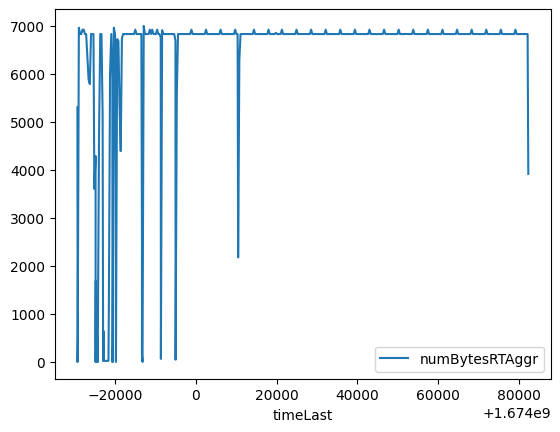

In [24]:
# la perla con ip destino u origen 9.9.5.30 La Perla
tmp.plot(x="timeLast", y=["numBytesRTAggr"])

In [25]:
# comprobar si la distribucion de flujos es la misma si solo se filtra por una IP incluyendo ambos sentidos A,B 
tmp1 = dfdata[['dir','timeLast','srcIP','dstIP','dstPortClass','nDPIclass','numBytesRTAggr','tcpStatesAFlags','nDPIMasterProto']]
tmp1=tmp1[tmp1.eval("(srcIP == '9.9.5.30') & nDPIMasterProto == 244 ")]
tmp1.head()

,dir,timeLast,srcIP,dstIP,dstPortClass,nDPIclass,numBytesRTAggr,tcpStatesAFlags,nDPIMasterProto
7260,B,1.673971e+09,9.9.5.30,9.9.5.10,dnp,DNP3,5300,0x03,244
7284,A,1.673971e+09,9.9.5.30,9.9.5.10,unknown,DNP3,480,0x03,244
7288,B,1.673971e+09,9.9.5.30,9.9.5.10,dnp,DNP3,0,0x43,244
7291,B,1.673971e+09,9.9.5.30,9.9.5.10,dnp,DNP3,0,0x43,244
7293,B,1.673971e+09,9.9.5.30,9.9.5.10,dnp,DNP3,0,0x43,244


<Axes: xlabel='timeLast'>

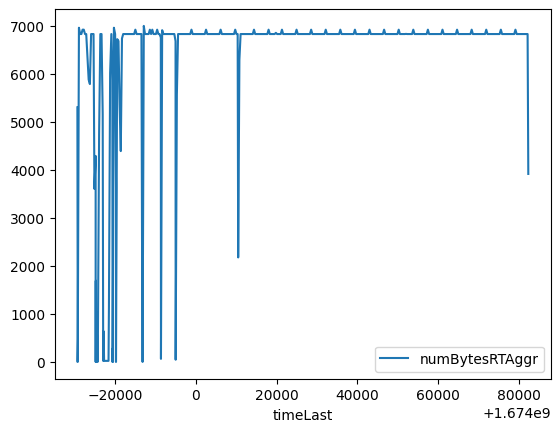

In [26]:
tmp1.plot(x="timeLast", y=["numBytesRTAggr"])

In [27]:
#comprobacion de ip origen destino
tmp[['srcIP','dstIP']].value_counts()

srcIP     dstIP   
9.9.5.9   9.9.5.30    330
9.9.5.10  9.9.5.30    240
9.9.5.30  9.9.5.10      2
          9.9.5.9       2
Name: count, dtype: int64

In [28]:
tmp1[['srcIP','dstIP']].value_counts()

srcIP     dstIP   
9.9.5.30  9.9.5.9     327
          9.9.5.10    238
Name: count, dtype: int64

## Explore data "Aguacapa"

In [29]:
tmp = dfdata[dfdata['dir']=='A']
tmp = tmp[['dir','timeLast','srcIP','dstIP','dstPortClass','nDPIclass','numBytesRTAggr','tcpStatesAFlags','nDPIMasterProto']]
tmp=tmp[tmp.eval("(srcIP == '9.9.5.11' | (dstIP == '9.9.5.11')) & nDPIMasterProto == 244 ")]
tmp[['srcIP','dstIP']].value_counts()

srcIP     dstIP   
9.9.5.10  9.9.5.11    379
Name: count, dtype: int64

<Axes: xlabel='timeLast'>

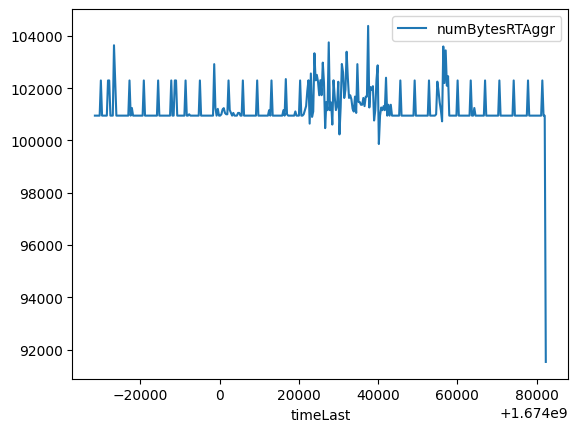

In [30]:
tmp.plot(x="timeLast", y=["numBytesRTAggr"])

## Explore data "Pantaleon"

In [31]:
tmp = dfdata[dfdata['dir']=='A']
tmp = tmp[['dir','timeLast','srcIP','dstIP','dstPortClass','nDPIclass','numBytesRTAggr','tcpStatesAFlags','nDPIMasterProto']]
tmp=tmp[tmp.eval("(srcIP == '9.9.5.248' | (dstIP == '9.9.5.248')) & nDPIMasterProto == 244 ")]
tmp[['srcIP','dstIP']].value_counts()

srcIP     dstIP    
9.9.5.10  9.9.5.248    379
Name: count, dtype: int64

<Axes: xlabel='timeLast'>

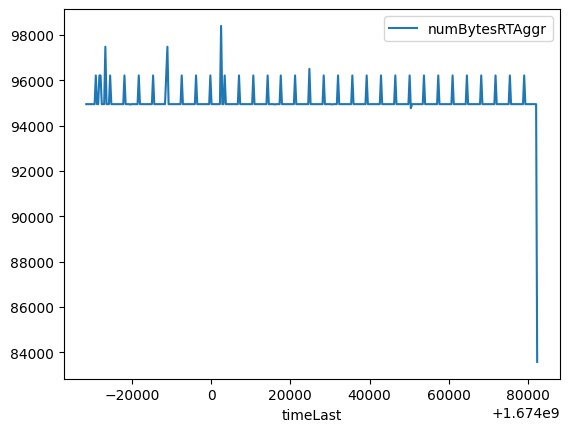

In [32]:
tmp.plot(x="timeLast", y=["numBytesRTAggr"])

## Explore data "Satelitales" ingenio magdalena

In [33]:
tmp = dfdata[dfdata['dir']=='A']
tmp = tmp[['dir','timeLast','srcIP','dstIP','dstPortClass','nDPIclass','numBytesRTAggr','tcpStatesAFlags','nDPIMasterProto']]
tmp=tmp[tmp.eval("(srcIP == '9.9.5.236' | (dstIP == '9.9.5.236')) & nDPIMasterProto == 244 ")]
tmp[['srcIP','dstIP']].value_counts()

srcIP     dstIP    
9.9.5.10  9.9.5.236    339
9.9.5.9   9.9.5.236     53
Name: count, dtype: int64

<Axes: xlabel='timeLast'>

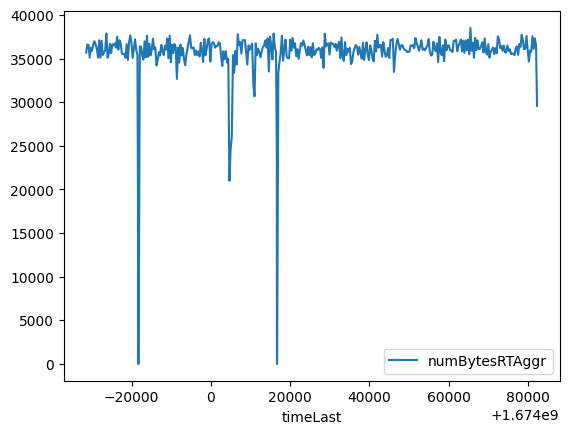

In [34]:
tmp.plot(x="timeLast", y=["numBytesRTAggr"])

### Magdalena dividiendo si la maestra envia o recive
**Buscando patron vertical**

NOTA: Magdalena cambia de maestra

In [35]:
tmp = dfdata[dfdata['dir']=='A']
tmp = tmp[['dir','timeLast','srcIP','dstIP','srcPort','dstPort','dstPortClass','nDPIclass','numBytesSnt','numBytesRTAggr','tcpStatesAFlags','nDPIMasterProto']]
tmp=tmp[tmp.eval("(srcIP == '9.9.5.236' | (dstIP == '9.9.5.236')) & nDPIMasterProto == 244 ")]
## se agregar la columna numBytesRcv
tmp['numBytesRcvd'] = tmp['numBytesRTAggr']-tmp['numBytesSnt']
tmp[['srcIP','dstIP']].value_counts()

srcIP     dstIP    
9.9.5.10  9.9.5.236    339
9.9.5.9   9.9.5.236     53
Name: count, dtype: int64

<Axes: xlabel='timeLast'>

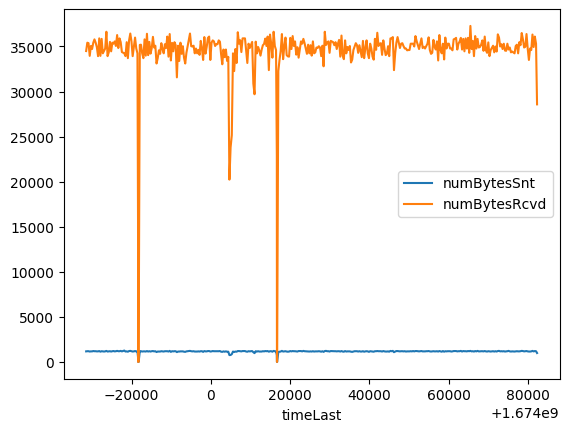

In [36]:
tmp.plot(x="timeLast", y=["numBytesSnt","numBytesRcvd"])

## Explore data hidro Oxec
Hidro Oxec 10.91.1.34

In [37]:
tmp = dfdata[dfdata['dir']=='A']
tmp = tmp[['dir','timeLast','srcIP','dstIP','dstPortClass','nDPIclass','numBytesRTAggr','tcpStatesAFlags','nDPIMasterProto']]
tmp=tmp[tmp.eval("(srcIP == '10.91.1.34' | (dstIP == '10.91.1.34')) & nDPIMasterProto == 244 ")]
tmp[['srcIP','dstIP']].value_counts()

srcIP       dstIP     
10.99.5.10  10.91.1.34    379
Name: count, dtype: int64

<Axes: xlabel='timeLast'>

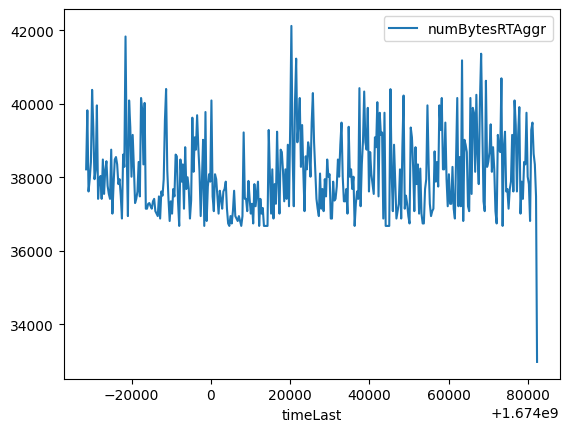

In [38]:
tmp.plot(x="timeLast", y=["numBytesRTAggr"])

### Analisis de patron vertical  | RTU Oxec
Concatenación y analisis de flujos

**CONCLUSION:** Al dividir quien enviar y recibe ya se tiene mas definid un patron vertical/concatenacion

Para tener visibilidad de quien envia y recie se agregan las columas numBytesSnt, numBytesRcvd

In [39]:
tmp = dfdata[dfdata['dir']=='A']
tmp = tmp[['dir','timeLast','srcIP','dstIP','srcPort','dstPort','dstPortClass','nDPIclass','numBytesSnt','numBytesRTAggr','tcpStatesAFlags','nDPIMasterProto']]
tmp=tmp[tmp.eval("(srcIP == '10.91.1.34' | (dstIP == '10.91.1.34')) & nDPIMasterProto == 244 ")]
tmp[['srcIP','dstIP']].value_counts()

srcIP       dstIP     
10.99.5.10  10.91.1.34    379
Name: count, dtype: int64

In [40]:
tmp.head()

,dir,timeLast,srcIP,dstIP,srcPort,dstPort,dstPortClass,nDPIclass,numBytesSnt,numBytesRTAggr,tcpStatesAFlags,nDPIMasterProto
209,A,1.673969e+09,10.99.5.10,10.91.1.34,51274,20000,dnp,DNP3,3395,38216,0x03,244
1064,A,1.673969e+09,10.99.5.10,10.91.1.34,51274,20000,dnp,DNP3,4355,39824,0x03,244
1988,A,1.673969e+09,10.99.5.10,10.91.1.34,51274,20000,dnp,DNP3,3035,37613,0x03,244
2878,A,1.673969e+09,10.99.5.10,10.91.1.34,51274,20000,dnp,DNP3,3235,37948,0x03,244
3794,A,1.673970e+09,10.99.5.10,10.91.1.34,51274,20000,dnp,DNP3,3515,38417,0x03,244


Acomodar los datos para que tengamos numBytesRcv


In [41]:
tmp['numBytesRcvd'] = tmp['numBytesRTAggr']-tmp['numBytesSnt']

<Axes: xlabel='timeLast'>

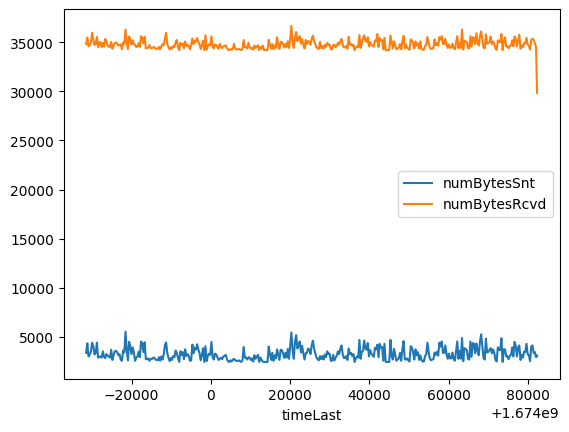

In [42]:
tmp.plot(x="timeLast", y=["numBytesSnt","numBytesRcvd"])

# Hashing table

resumen:
Los valores de flowInd son lineales y no se repiten, tipo uint64_t en C

Flujos sin payload son : 19870 entries

## Explore index for hashing table
Conclusion: Se puede usar la funsion hash simple index=Xmod(N), ya que el index de flujos es lineal no repetitivo


<Axes: xlabel='timeLast'>

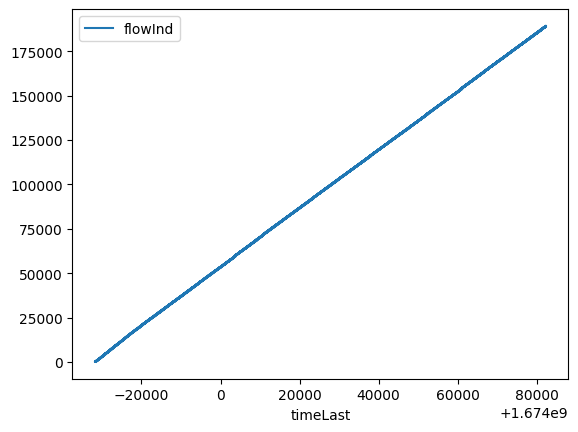

In [55]:
tmp = dfdata[dfdata['dir']=='A']
tmp.plot(x="timeLast", y=["flowInd"])

In [56]:
# se agrupan por flow Ind y se cuentan por nDPImasterProto  ya que siempre tiene un numero asignado
tmp = tmp[['dir','flowInd','timeLast','srcIP','dstIP','dstPortClass','nDPIclass','numBytesRTAggr','tcpStatesAFlags','nDPIMasterProto']]
tmp['Counts'] = tmp.groupby(['flowInd'])['nDPIMasterProto'].transform('count')

/tmp/ipykernel_688/3433522761.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['Counts'] = tmp.groupby(['flowInd'])['nDPIMasterProto'].transform('count')


<Axes: xlabel='timeLast'>

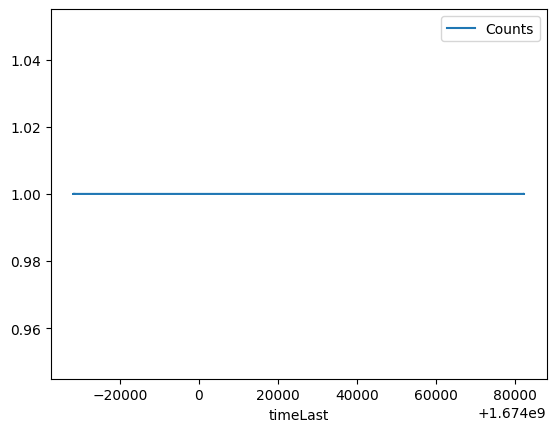

In [57]:
tmp.plot(x="timeLast", y=["Counts"])

## Datos DNP3, SNMP etc sin payload
resumen:

<Axes: xlabel='timeLast'>

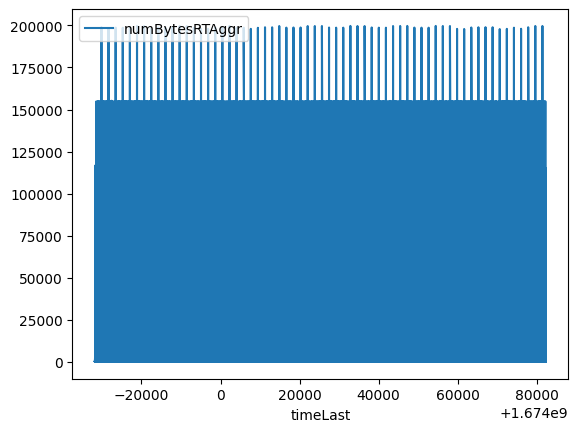

In [71]:
tmp = dfdata[dfdata['dir']=='A']
tmp.plot(x="timeLast", y=["numBytesRTAggr"])

In [72]:
tmp=tmp[tmp.eval("numBytesRTAggr < 1 ")]


In [77]:
tmp.head()

,dir,flowInd,flowStat,timeFirst,timeLast,duration,srcIP,srcPort,dstIP,dstPort,...,dstPortClassN,dstPortClass,nDPIMasterProto,nDPISubProto,nDPIclass,numPktsSnt,numPktsRTAggr,numBytesSnt,numBytesRTAggr,tcpStatesAFlags
101,A,53,0x0400000000004000,1.673968e+09,1.673968e+09,0.000000,10.99.5.9,54038,10.94.0.178,20000,...,20000,dnp,244,0,DNP3,1,1,0,0,0x03
231,A,120,0x0400000000004000,1.673968e+09,1.673968e+09,3.011763,9.9.5.10,49813,9.9.5.237,20000,...,20000,dnp,244,0,DNP3,2,2,0,0,0x03
236,A,124,0x0400000000004000,1.673968e+09,1.673968e+09,3.012303,10.99.5.9,54046,10.94.0.178,20000,...,20000,dnp,244,0,DNP3,2,2,0,0,0x03
242,A,129,0x0400000000004000,1.673968e+09,1.673968e+09,2.997537,9.9.5.10,23877,9.9.5.237,20000,...,20000,dnp,244,0,DNP3,2,2,0,0,0x03
243,A,130,0x0400000000004000,1.673968e+09,1.673968e+09,2.996563,10.99.5.9,54049,10.94.0.178,20000,...,20000,dnp,244,0,DNP3,2,2,0,0,0x03


In [78]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19870 entries, 101 to 325116
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   dir              19870 non-null  object 
 1   flowInd          19870 non-null  int64  
 2   flowStat         19870 non-null  object 
 3   timeFirst        19870 non-null  float64
 4   timeLast         19870 non-null  float64
 5   duration         19870 non-null  float64
 6   srcIP            19870 non-null  object 
 7   srcPort          19870 non-null  int64  
 8   dstIP            19870 non-null  object 
 9   dstPort          19870 non-null  int64  
 10  l4Proto          19870 non-null  int64  
 11  dstPortClassN    19870 non-null  int64  
 12  dstPortClass     19870 non-null  object 
 13  nDPIMasterProto  19870 non-null  int64  
 14  nDPISubProto     19870 non-null  int64  
 15  nDPIclass        19870 non-null  object 
 16  numPktsSnt       19870 non-null  int64  
 17  numPktsRTAggr 

# EWMA
prueba con Ingenio Pantaleon: 9.9.5.248

## Mean data

In [46]:
dfdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325129 entries, 0 to 325128
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   dir              325129 non-null  object 
 1   flowInd          325129 non-null  int64  
 2   flowStat         325129 non-null  object 
 3   timeFirst        325129 non-null  float64
 4   timeLast         325129 non-null  float64
 5   duration         325129 non-null  float64
 6   srcIP            325129 non-null  object 
 7   srcPort          325129 non-null  int64  
 8   dstIP            325129 non-null  object 
 9   dstPort          325129 non-null  int64  
 10  l4Proto          325129 non-null  int64  
 11  dstPortClassN    325129 non-null  int64  
 12  dstPortClass     325129 non-null  object 
 13  nDPIMasterProto  325129 non-null  int64  
 14  nDPISubProto     325129 non-null  int64  
 15  nDPIclass        325129 non-null  object 
 16  numPktsSnt       325129 non-null  int6

In [47]:
df=dfdata[dfdata.eval("(srcIP == '10.91.1.34' | (dstIP == '10.91.1.34')) & (nDPIMasterProto == 244) & dir == 'A'  ")]
#df['timeLast'] = pd.to_datetime(df['timeLast'],unit='s')

df.head()

,dir,flowInd,flowStat,timeFirst,timeLast,duration,srcIP,srcPort,dstIP,dstPort,...,dstPortClassN,dstPortClass,nDPIMasterProto,nDPISubProto,nDPIclass,numPktsSnt,numPktsRTAggr,numBytesSnt,numBytesRTAggr,tcpStatesAFlags
209,A,108,0x0400020000004000,1.673968e+09,1.673969e+09,297.583916,10.99.5.10,51274,10.91.1.34,20000,...,20000,dnp,244,0,DNP3,271,640,3395,38216,0x03
1064,A,622,0x0400020000004000,1.673969e+09,1.673969e+09,297.236252,10.99.5.10,51274,10.91.1.34,20000,...,20000,dnp,244,0,DNP3,319,760,4355,39824,0x03
1988,A,1176,0x0400020000004000,1.673969e+09,1.673969e+09,297.240057,10.99.5.10,51274,10.91.1.34,20000,...,20000,dnp,244,0,DNP3,253,595,3035,37613,0x03
2878,A,1710,0x0400020000004000,1.673969e+09,1.673969e+09,297.225677,10.99.5.10,51274,10.91.1.34,20000,...,20000,dnp,244,0,DNP3,263,620,3235,37948,0x03
3794,A,2256,0x0400020000004000,1.673969e+09,1.673970e+09,298.516748,10.99.5.10,51274,10.91.1.34,20000,...,20000,dnp,244,0,DNP3,277,654,3515,38417,0x03


In [48]:
df['mean'] = df['numBytesRTAggr'].rolling(10).mean()
df

/tmp/ipykernel_688/3594536887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mean'] = df['numBytesRTAggr'].rolling(10).mean()


,dir,flowInd,flowStat,timeFirst,timeLast,duration,srcIP,srcPort,dstIP,dstPort,...,dstPortClass,nDPIMasterProto,nDPISubProto,nDPIclass,numPktsSnt,numPktsRTAggr,numBytesSnt,numBytesRTAggr,tcpStatesAFlags,mean
209,A,108,0x0400020000004000,1.673968e+09,1.673969e+09,297.583916,10.99.5.10,51274,10.91.1.34,20000,...,dnp,244,0,DNP3,271,640,3395,38216,0x03,NaN
1064,A,622,0x0400020000004000,1.673969e+09,1.673969e+09,297.236252,10.99.5.10,51274,10.91.1.34,20000,...,dnp,244,0,DNP3,319,760,4355,39824,0x03,NaN
1988,A,1176,0x0400020000004000,1.673969e+09,1.673969e+09,297.240057,10.99.5.10,51274,10.91.1.34,20000,...,dnp,244,0,DNP3,253,595,3035,37613,0x03,NaN
2878,A,1710,0x0400020000004000,1.673969e+09,1.673969e+09,297.225677,10.99.5.10,51274,10.91.1.34,20000,...,dnp,244,0,DNP3,263,620,3235,37948,0x03,NaN
3794,A,2256,0x0400020000004000,1.673969e+09,1.673970e+09,298.516748,10.99.5.10,51274,10.91.1.34,20000,...,dnp,244,0,DNP3,277,654,3515,38417,0x03,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321014,A,186906,0x0400020000004000,1.674081e+09,1.674081e+09,297.240599,10.99.5.10,51274,10.91.1.34,20000,...,dnp,244,0,DNP3,309,735,4155,39489,0x03,38323.2
321993,A,187501,0x0400020000004000,1.674081e+09,1.674081e+09,299.257622,10.99.5.10,51274,10.91.1.34,20000,...,dnp,244,0,DNP3,272,642,3388,38638,0x03,38398.9
322883,A,188008,0x0400020000004000,1.674081e+09,1.674082e+09,297.375338,10.99.5.10,51274,10.91.1.34,20000,...,dnp,244,0,DNP3,275,650,3475,38350,0x03,38492.7
323765,A,188516,0x0400020000004000,1.674082e+09,1.674082e+09,297.240306,10.99.5.10,51274,10.91.1.34,20000,...,dnp,244,0,DNP3,249,585,2955,37479,0x03,38398.9


<Axes: xlabel='timeLast'>

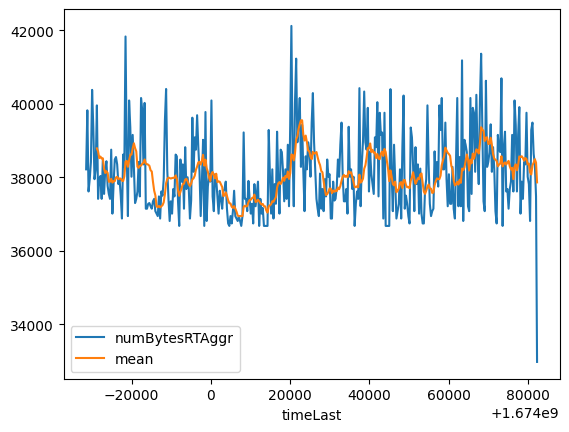

In [49]:
df.plot(x="timeLast", y=["numBytesRTAggr","mean"])



In [50]:
df['EWMA6'] = df['numBytesRTAggr'].iloc[0:].ewm(span=12, adjust=False).mean()
df['EWMA6_sadjust'] = df['numBytesRTAggr'].iloc[0:].ewm(span=6,adjust=False).mean()

/tmp/ipykernel_688/2239242055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EWMA6'] = df['numBytesRTAggr'].iloc[0:].ewm(span=12, adjust=False).mean()
/tmp/ipykernel_688/2239242055.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EWMA6_sadjust'] = df['numBytesRTAggr'].iloc[0:].ewm(span=6,adjust=False).mean()


<Axes: xlabel='timeLast'>

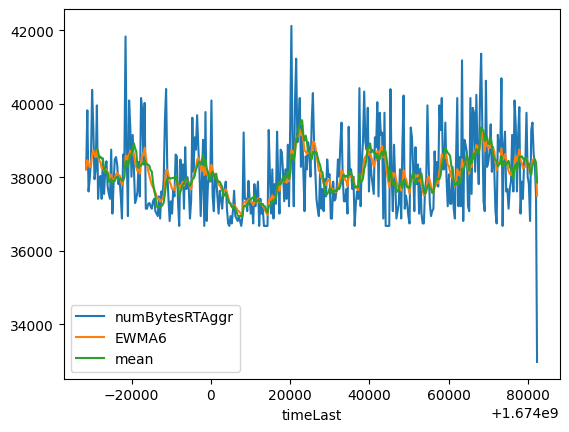

In [51]:
df.plot(x="timeLast", y=["numBytesRTAggr","EWMA6","mean"])
